<a id='0'></a>
# Tourist data analysis
Input: cleaned data

### contents:

- <a href='#log_reg_cv'>Logistic Regression CV</a>
- <a href='#plots'>Plots</a>
- <a href='#phi_k'>$\phi_K$</a>
- <a href='#fac_an'>Factor Analysis</a>

## Read data

In [1]:
import pandas as pd
import xlrd
import numpy as np

In [2]:
cols = ['prefs-nature','prefs-price','prefs-active_rest','prefs-mates','prefs-comfort','prefs-theme_parks'
             ,'prefs-quiet','prefs-new_cultures','prefs-history','prefs-accommodation','prefs-active_time','prefs-beach'
             ,'prefs-easy_access','prefs-security','prefs-weather','prefs-entertainment','prefs-meet'
            ,'info-agency','info-hotel_site','info-friends','info-region_site','info-own','info-none','info-forums'
             ,'info-guides','info-TripAdvisor'
             ,'place-location','place-ratings','place-nature','place-show_off','place-ease','place-price','place-popularity'
             ,'place-climate','place-variety','place-history','place-new','place-security'
            ,'hotel-owner','hotel-reaching','hotel-recommend','hotel-price','hotel-security','hotel-cleanliness'
             ,'hotel-service','hotel-location','hotel-facility','hotel-opinions','hotel-comfort'
            ,'activity-sightseeing','activity-culture','activity-cuisine','activity-friends','activity-sunbathing'
             ,'activity-family','activity-knowledge','activity-shopping','activity-fun','activity-sport'
            ,'sat-weather','sat-nature','sat-assessment','sat-hotel','sat-friends','sat-atmosphere','sat-price'
             ,'sat-expectations','sat-service','sat-cleanliness','sat-history'
            ,'share-talk','share-photos_SM','share-review_SM','share-recommend_agency','share-review_hotel_int'
             ,'share-review_region_int','share-recommend_hotel','share-recommend_region']

pd.set_option('display.max_columns', 500)
df = pd.read_csv('../output/df4_cleaned_data.csv', index_col=0)
df.head()

,prefs-nature,prefs-price,prefs-active_rest,prefs-mates,prefs-comfort,prefs-theme_parks,prefs-quiet,prefs-new_cultures,prefs-history,prefs-accommodation,prefs-active_time,prefs-beach,prefs-easy_access,prefs-security,prefs-weather,prefs-entertainment,prefs-meet,info-agency,info-hotel_site,info-friends,info-region_site,info-own,info-none,info-forums,info-guides,info-TripAdvisor,place-location,place-ratings,place-nature,place-show_off,place-ease,place-price,place-popularity,place-climate,place-variety,place-history,place-new,place-security,hotel-owner,hotel-reaching,hotel-recommend,hotel-price,hotel-security,hotel-cleanliness,hotel-service,hotel-location,hotel-facility,hotel-opinions,hotel-comfort,activity-sightseeing,activity-culture,activity-cuisine,activity-friends,activity-sunbathing,activity-family,activity-knowledge,activity-shopping,activity-fun,activity-sport,sat-weather,sat-nature,sat-assessment,sat-hotel,sat-friends,sat-atmosphere,sat-price,sat-expectations,sat-service,sat-cleanliness,sat-history,share-talk,share-photos_SM,share-review_SM,share-recommend_agency,share-review_hotel_int,share-review_region_int,share-recommend_hotel,share-recommend_region,age,country
138,4.0,5.0,5,5,4.0,3.0,2.0,2,4,5.0,5.0,2,5,1.0,5,5.0,5.0,2,5.0,5,3.0,5,1.0,4.0,1.0,5.0,5,5,3.0,3,5,5,5,5,5.0,3,5,2,3,5,5,5.0,3,5,5.0,5.0,3.0,4.0,5.0,3.0,2,4,5.0,3,5,3.0,5.0,5.0,5.0,5,5.0,5,5,5,5.0,5,3.0,5,5,2,5.0,5.0,5.0,2.0,1.0,1.0,2.0,3.0,18,ukraina
139,2.0,4.0,3,5,5.0,5.0,1.0,4,3,3.0,4.0,2,3,4.0,2,5.0,4.0,1,5.0,3,4.0,4,2.0,4.0,2.0,5.0,4,3,2.0,4,4,5,4,2,4.0,5,5,4,5,4,3,3.0,4,3,5.0,4.0,3.0,3.0,5.0,4.0,5,4,5.0,2,4,5.0,3.0,5.0,3.0,3,4.0,4,4,5,5.0,5,5.0,4,3,5,5.0,5.0,4.0,1.0,4.0,3.0,5.0,5.0,18,ukraina
140,1.0,4.0,5,2,3.0,3.0,4.0,2,1,3.0,2.0,1,3,1.0,3,4.0,3.0,3,4.0,1,5.0,4,2.0,5.0,3.0,3.0,5,2,3.0,2,2,4,1,3,2.0,5,3,4,2,3,5,4.0,5,1,3.0,4.0,2.0,4.0,3.0,3.0,2,5,4.0,1,3,4.0,1.0,5.0,4.0,1,3.0,1,3,4,5.0,2,1.0,3,2,5,1.0,3.0,5.0,4.0,2.0,5.0,3.0,3.0,18,ukraina
141,4.0,3.0,3,5,3.0,2.0,2.0,1,1,3.0,1.0,1,2,3.0,2,2.0,3.0,1,4.0,2,1.0,4,2.0,4.0,5.0,2.0,4,2,3.0,2,2,5,1,4,4.0,2,3,1,3,3,4,2.0,5,2,3.0,2.0,5.0,3.0,3.0,2.0,4,5,2.0,3,2,4.0,3.0,4.0,1.0,5,5.0,2,4,2,3.0,2,3.0,4,4,3,2.0,3.0,3.0,2.0,4.0,3.0,5.0,2.0,18,polska
142,5.0,5.0,5,5,5.0,5.0,5.0,5,5,5.0,5.0,5,5,5.0,5,5.0,5.0,5,4.0,5,4.0,5,1.0,4.0,4.0,2.0,5,5,5.0,4,5,5,5,5,5.0,5,5,5,3,4,4,5.0,5,5,5.0,5.0,5.0,5.0,5.0,5.0,5,5,5.0,5,5,5.0,5.0,5.0,5.0,5,5.0,5,5,5,5.0,5,5.0,5,5,5,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,18,polska


<a id='plots'></a>
<a href='#0'>back</a><br>

## Plots

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

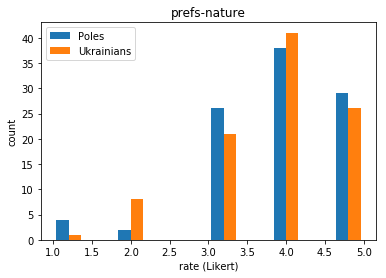

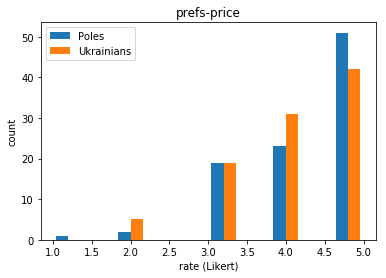

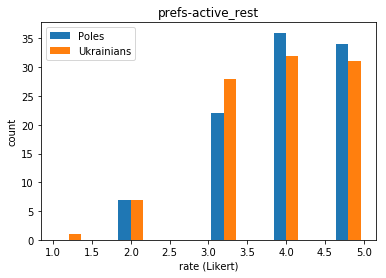

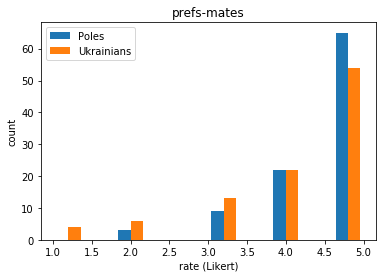

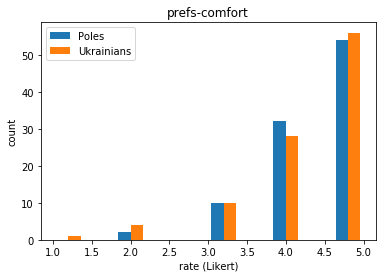

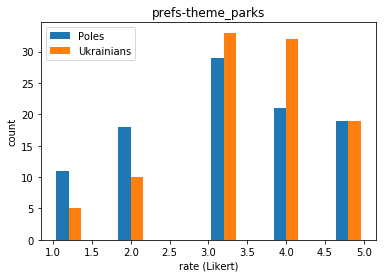

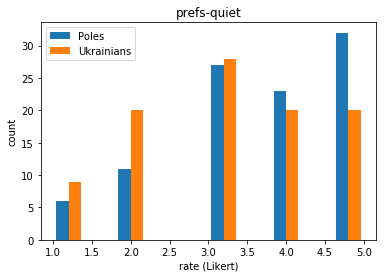

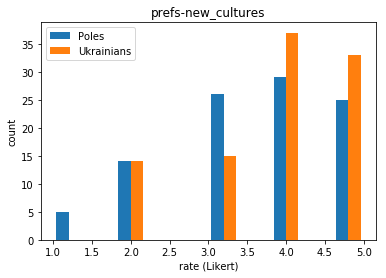

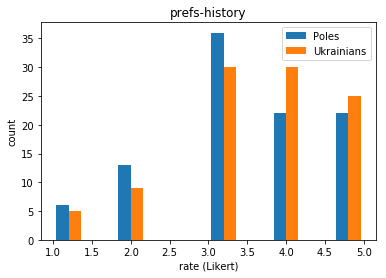

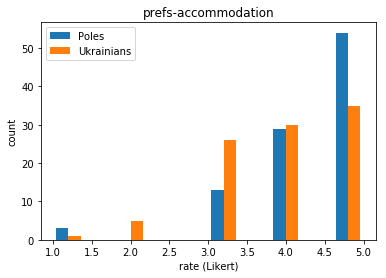

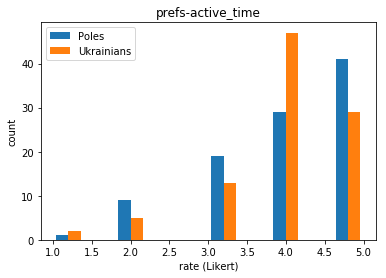

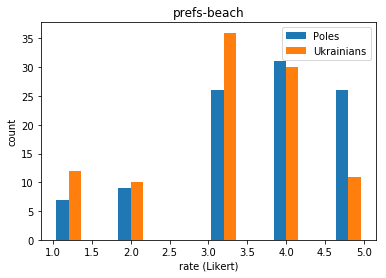

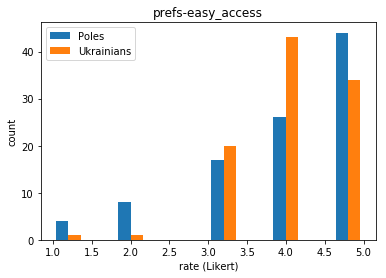

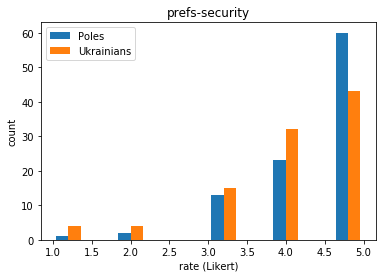

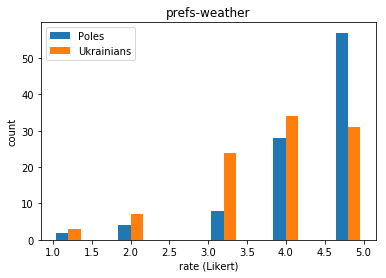

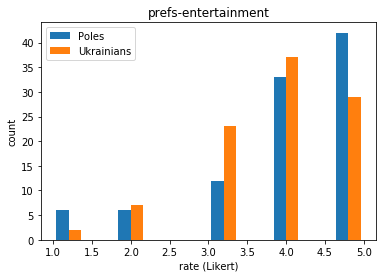

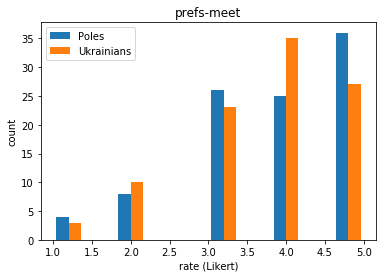

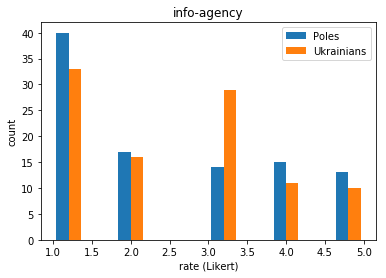

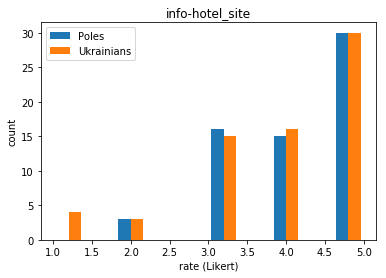

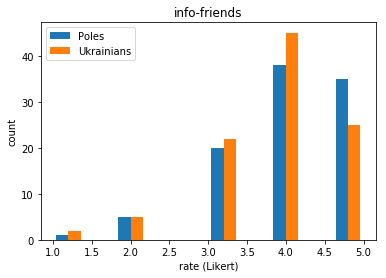

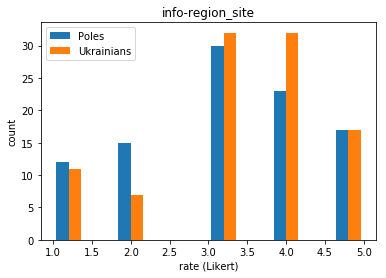

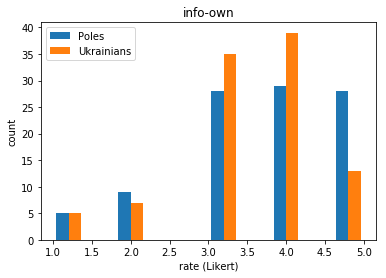

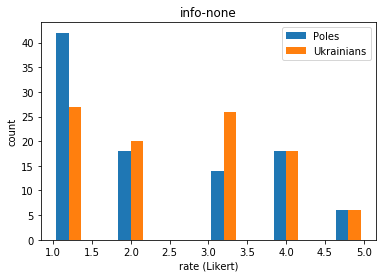

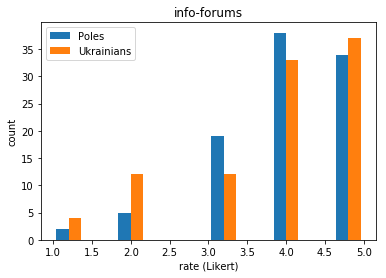

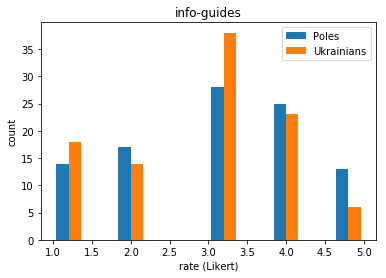

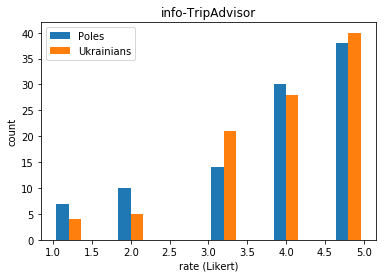

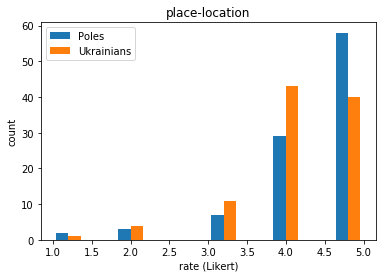

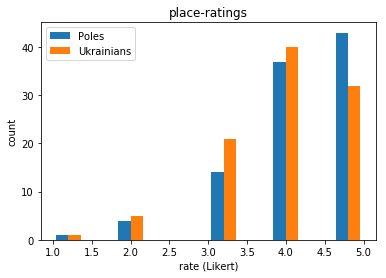

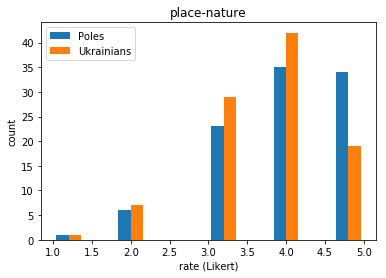

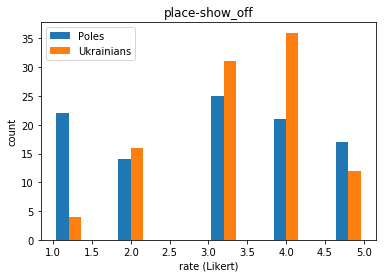

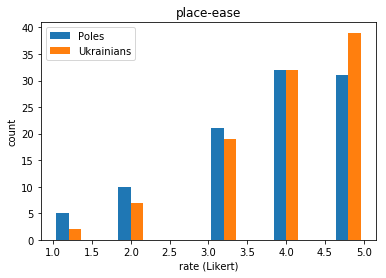

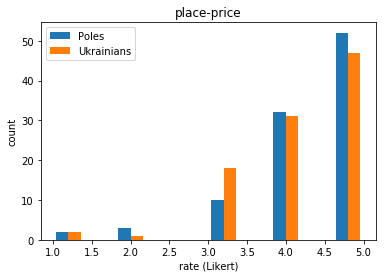

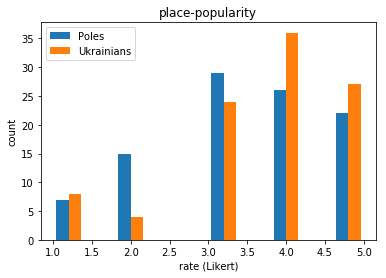

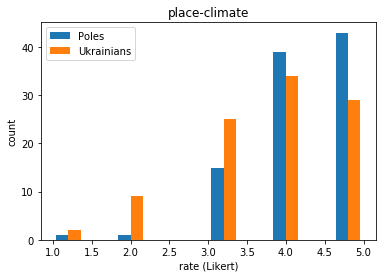

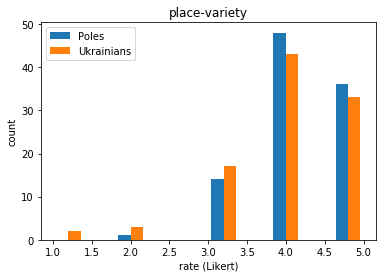

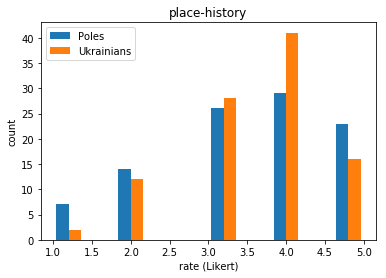

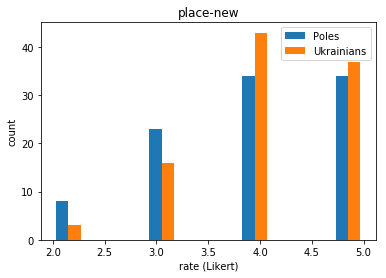

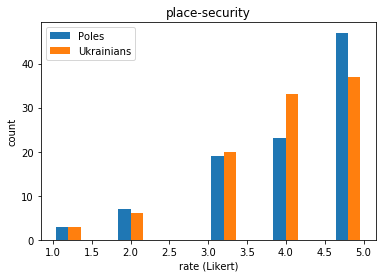

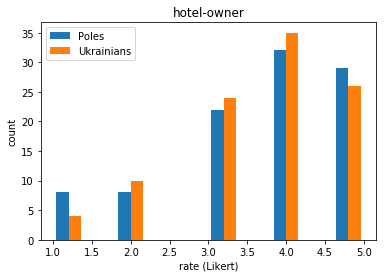

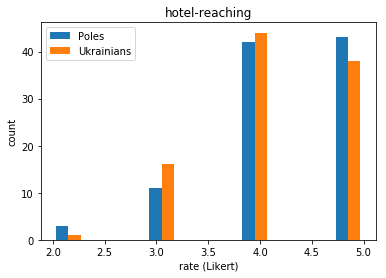

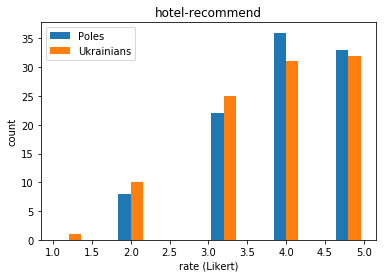

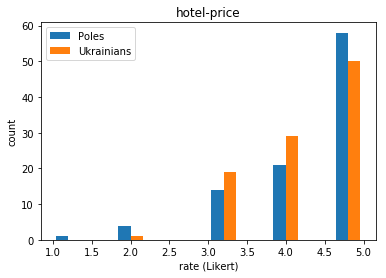

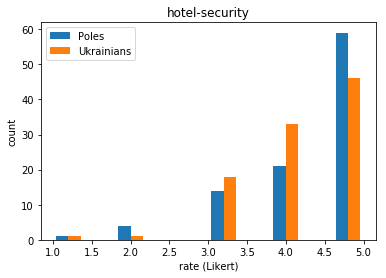

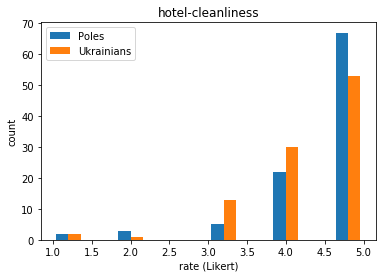

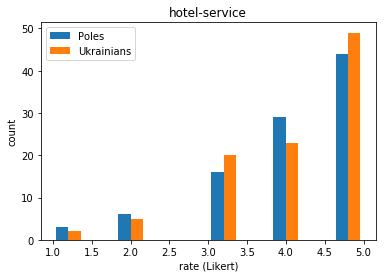

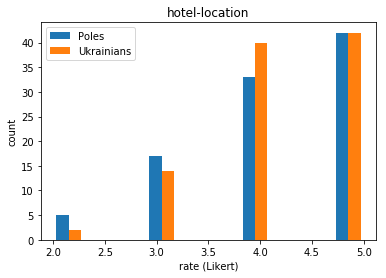

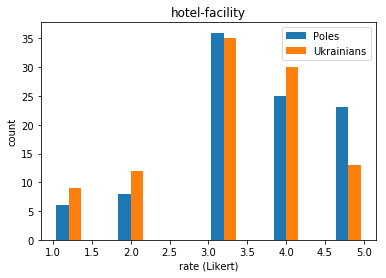

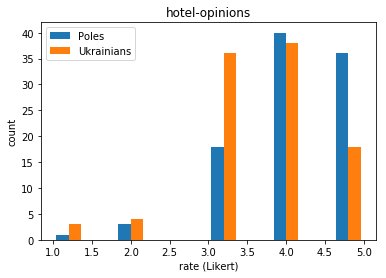

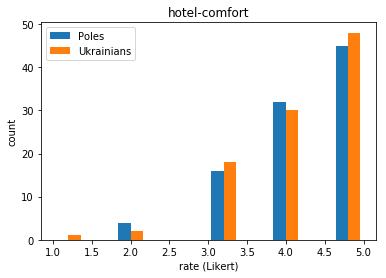

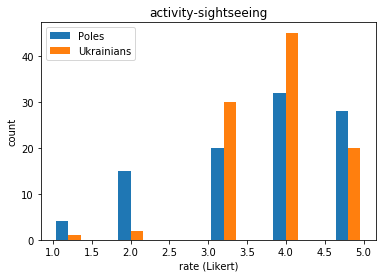

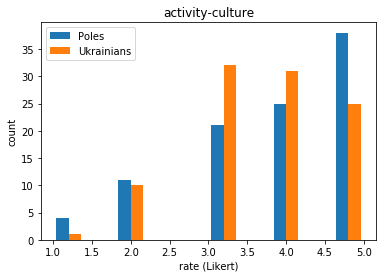

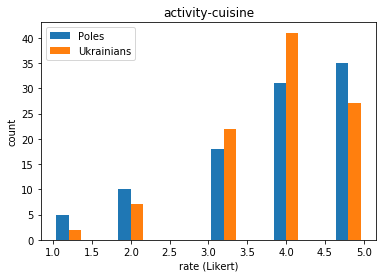

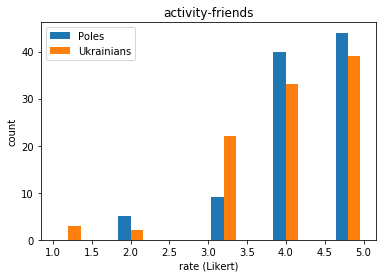

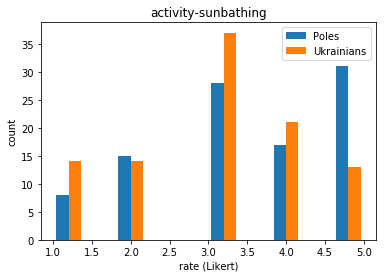

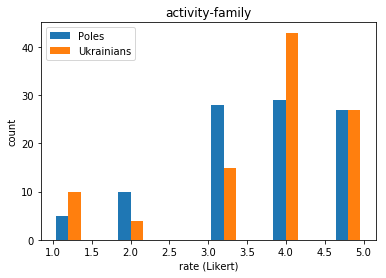

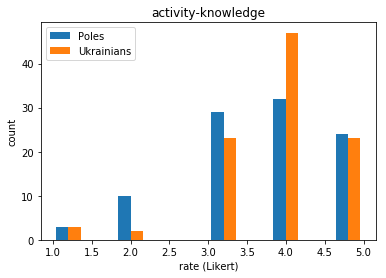

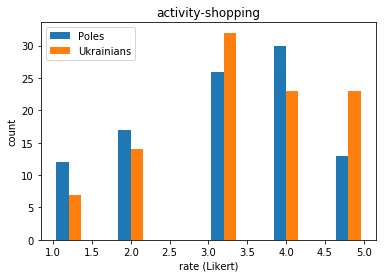

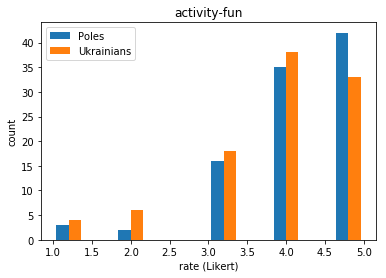

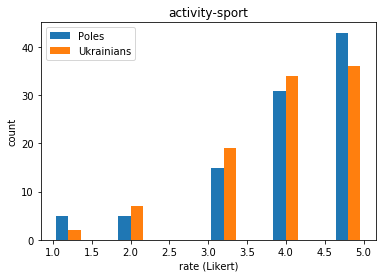

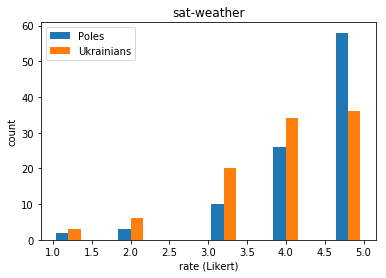

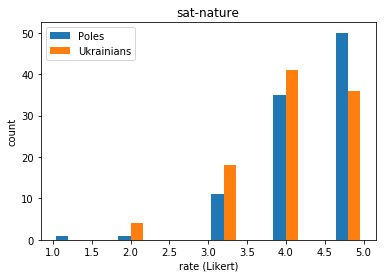

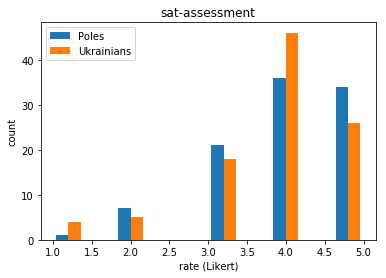

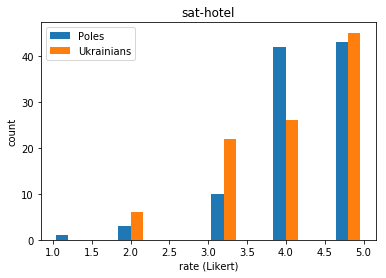

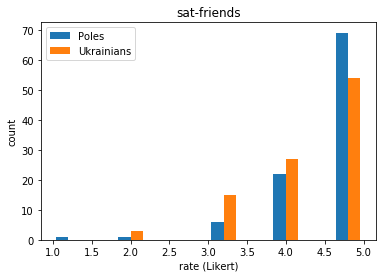

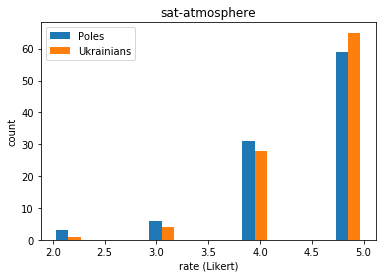

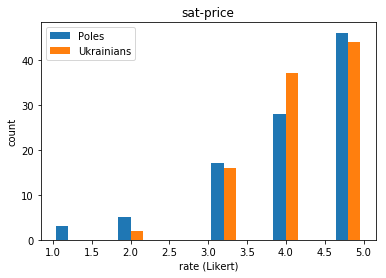

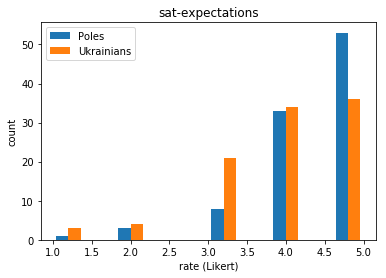

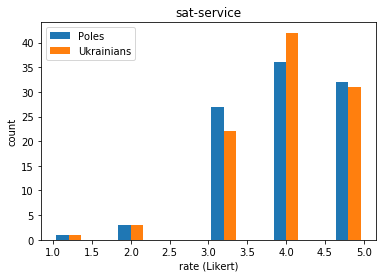

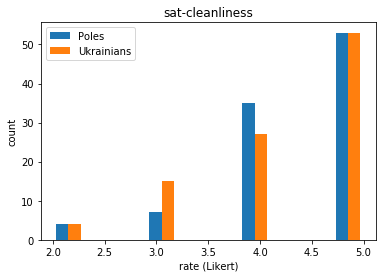

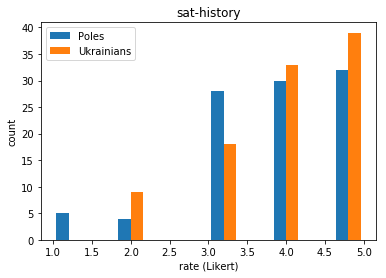

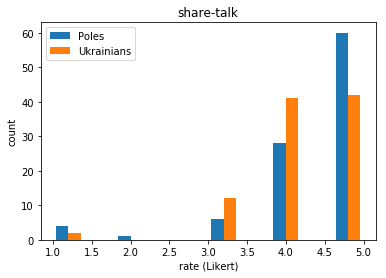

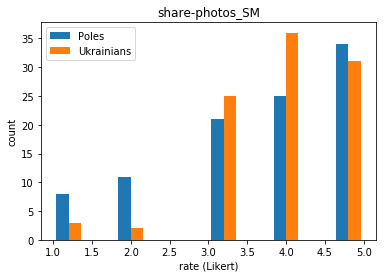

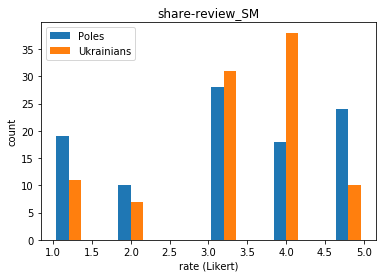

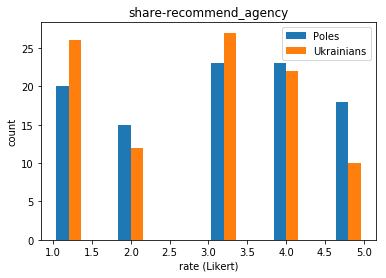

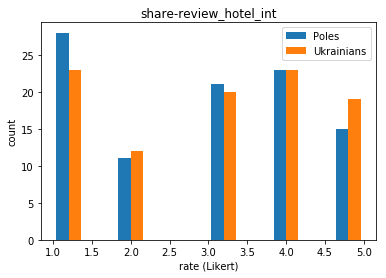

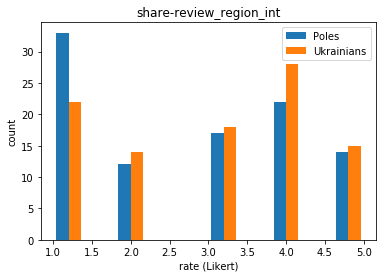

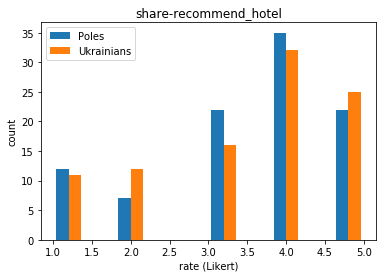

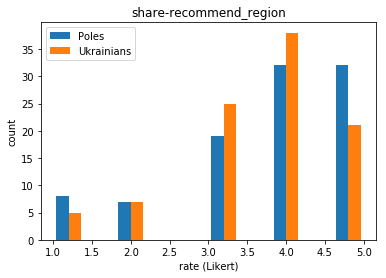

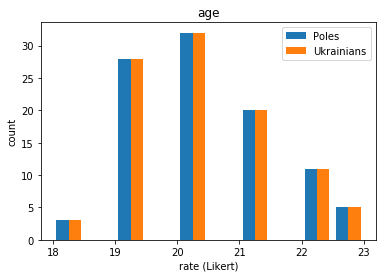

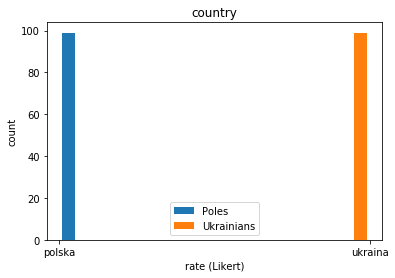

In [74]:
pl=df[df['country']=='polska']
uk=df[df['country']=='ukraina']

for col in df.columns:
    fig, ax = plt.subplots()
    ax.hist([pl[col],uk[col]], label=('Poles','Ukrainians')) 
    ax.legend()
    ax.set_title(col)
    ax.set_xlabel('rate (Likert)')
    ax.set_ylabel('count')

<a id='phi_k'></a>
<a href='#0'>back</a><br>

## **$\phi_k$ correlations**

In [17]:
import phik
from phik import resources, report

In [18]:
#correlation
cor_matrix=df.phik_matrix(interval_cols=['age'])
cor_matrix

/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 18.49999999999999 - 18.999999999999993
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s}'.format(str(bin_edges[i-1]), str(bin_edges[i])))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 19.499999999999993 - 19.999999999999993
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s}'.format(str(bin_edges[i-1]), str(bin_edges[i])))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 20.499999999999993 - 20.999999999999996
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s}'.format(str(bin_edges[i-1]), str(bin_edges[i])))
/home/ant_on_su/miniconda3/envs/Maczek/lib/python3.7/site-packages/phik/binning.py:68: UserWarning: Empty bin with bin-edges 22.0 - 22.5
  warnings.warn('Empty bin with bin-edges {0:s} - {1:s

var2,activity-cuisine,activity-culture,activity-family,activity-friends,activity-fun,activity-knowledge,activity-shopping,activity-sightseeing,activity-sport,activity-sunbathing,age,country,hotel-cleanliness,hotel-comfort,hotel-facility,hotel-location,hotel-opinions,hotel-owner,hotel-price,hotel-reaching,hotel-recommend,hotel-security,hotel-service,info-TripAdvisor,info-agency,info-forums,info-friends,info-guides,info-hotel_site,info-none,info-own,info-region_site,place-climate,place-ease,place-history,place-location,place-nature,place-new,place-popularity,place-price,place-ratings,place-security,place-show_off,place-variety,prefs-accommodation,prefs-active_rest,prefs-active_time,prefs-beach,prefs-comfort,prefs-easy_access,prefs-entertainment,prefs-history,prefs-mates,prefs-meet,prefs-nature,prefs-new_cultures,prefs-price,prefs-quiet,prefs-security,prefs-theme_parks,prefs-weather,sat-assessment,sat-atmosphere,sat-cleanliness,sat-expectations,sat-friends,sat-history,sat-hotel,sat-nature,sat-price,sat-service,sat-weather,share-photos_SM,share-recommend_agency,share-recommend_hotel,share-recommend_region,share-review_SM,share-review_hotel_int,share-review_region_int,share-talk
var1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
activity-cuisine,1.000000,0.707400,0.311354,0.357226,0.271647,0.226178,0.520110,0.651144,0.308472,0.271298,0.049774,0.046800,0.205793,0.249772,0.398915,0.116315,0.275615,0.094473,0.000000,0.000000,0.130439,0.396561,0.291452,0.000000,0.138076,0.234663,0.130272,0.321812,0.343538,0.000000,0.000000,0.000000,0.100260,0.364364,0.297745,0.360268,0.275766,0.245689,0.459248,0.205091,0.365921,0.000000,0.312643,0.308818,0.299694,0.000000,0.096893,0.072604,0.137414,0.396330,0.239558,0.203028,0.000000,0.368059,0.418588,0.524132,0.241925,0.283878,0.000000,0.276363,0.011884,0.449639,0.130386,0.018017,0.267427,0.273173,0.466934,0.361243,0.423502,0.218113,0.374318,0.264873,0.218060,0.254666,0.200988,0.000000,0.303038,0.000000,0.000000,0.340053
activity-culture,0.707400,1.000000,0.000000,0.000000,0.263483,0.535684,0.144321,0.768401,0.263035,0.151585,0.000000,0.109101,0.228779,0.405745,0.281256,0.036047,0.104311,0.082649,0.175095,0.056562,0.086077,0.396412,0.283646,0.000000,0.000000,0.247344,0.151689,0.133405,0.000000,0.089176,0.000000,0.000000,0.000000,0.208888,0.655949,0.216946,0.391936,0.370193,0.207421,0.201535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101536,0.000000,0.000000,0.000000,0.000000,0.649501,0.117536,0.212313,0.340659,0.734149,0.000000,0.159892,0.281508,0.179088,0.000000,0.481511,0.000000,0.154277,0.265415,0.000000,0.773184,0.000000,0.404816,0.000000,0.000000,0.241927,0.153361,0.298369,0.346370,0.532573,0.115231,0.301007,0.313493,0.375522
activity-family,0.311354,0.000000,1.000000,0.555201,0.286212,0.288068,0.388229,0.472450,0.349258,0.284942,0.000000,0.154103,0.357785,0.370120,0.439128,0.162258,0.393221,0.243973,0.395746,0.137997,0.357394,0.135955,0.238292,0.324037,0.019927,0.332377,0.394932,0.210421,0.000000,0.000000,0.171447,0.143896,0.000000,0.515509,0.171411,0.209272,0.336120,0.142878,0.354406,0.366790,0.444424,0.126071,0.228833,0.339963,0.233371,0.343557,0.237410,0.000000,0.256775,0.000000,0.267102,0.000000,0.303471,0.336869,0.000000,0.209298,0.181114,0.199834,0.000000,0.333884,0.000000,0.381997,0.251117,0.181194,0.379135,0.472536,0.059120,0.238888,0.337071,0.162120,0.245489,0.265805,0.263239,0.335611,0.000000,0.241905,0.197347,0.000000,0.000000,0.413782
activity-friends,0.357226,0.000000,0.555201,1.000000,0.732070,0.000000,0.488672,0.303960,0.000000,0.175015,0.096543,0.152404,0.456324,0.160426,0.000000,0.282802,0.273674,0.000000,0.540456,0.258369,0.080951,0.152816,0.177818,0.462592,0.000000,0.327624,0.459599,0.000000,0.565840,0.314790,0.101628,0.243637,0.433101,0.341423,0.000000,0.444694,0.456759,0.062504,0.246543,0.000000,0.466983,0.363502,0.162919,0.527080,0.000000,0.000000,0.321185,0.000000,0.000000,0.218799,0.507132,0.313973,0.362755,0.357840,0.000000,

In [19]:
#significance
sig_matrix = df.significance_matrix(interval_cols=['age'])
sig_matrix

var2,activity-cuisine,activity-culture,activity-family,activity-friends,activity-fun,activity-knowledge,activity-shopping,activity-sightseeing,activity-sport,activity-sunbathing,age,country,hotel-cleanliness,hotel-comfort,hotel-facility,hotel-location,hotel-opinions,hotel-owner,hotel-price,hotel-reaching,hotel-recommend,hotel-security,hotel-service,info-TripAdvisor,info-agency,info-forums,info-friends,info-guides,info-hotel_site,info-none,info-own,info-region_site,place-climate,place-ease,place-history,place-location,place-nature,place-new,place-popularity,place-price,place-ratings,place-security,place-show_off,place-variety,prefs-accommodation,prefs-active_rest,prefs-active_time,prefs-beach,prefs-comfort,prefs-easy_access,prefs-entertainment,prefs-history,prefs-mates,prefs-meet,prefs-nature,prefs-new_cultures,prefs-price,prefs-quiet,prefs-security,prefs-theme_parks,prefs-weather,sat-assessment,sat-atmosphere,sat-cleanliness,sat-expectations,sat-friends,sat-history,sat-hotel,sat-nature,sat-price,sat-service,sat-weather,share-photos_SM,share-recommend_agency,share-recommend_hotel,share-recommend_region,share-review_SM,share-review_hotel_int,share-review_region_int,share-talk
var1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
activity-cuisine,21.719476,5.464097,0.927711,1.692247,0.531544,0.977220,2.827926,4.305584,1.046475,1.523035,0.426603,0.339089,0.632646,1.257100,2.092666,0.813947,1.317909,0.265217,-0.955909,-0.238378,0.269229,1.917468,1.089896,-0.775602,0.238466,0.692204,-0.295559,1.730981,1.237459,-0.361131,-1.139611,-0.737054,-0.326410,1.390126,1.268155,1.965267,1.434817,2.895712,2.268108,0.401169,1.632963,-0.478364,1.417668,1.023927,1.236674,-2.014871,0.366253,0.123646,-0.358877,1.294124,0.367982,0.035315,-0.312089,1.509076,2.524526,3.118946,1.564643,1.204004,-1.162231,1.098719,0.149386,2.967430,1.236484,-0.023418,0.975765,1.821793,2.037539,1.472183,2.765878,1.096358,1.310837,1.792292,0.198111,1.084822,0.519092,-0.218867,1.635849,-0.274664,-0.448070,1.595523
activity-culture,5.464097,21.927511,-0.747060,-0.840367,1.361947,3.144008,0.130589,6.432757,0.617012,0.255917,-0.974565,1.066925,0.659201,2.549153,1.036427,0.155649,0.115315,0.133881,0.367279,0.566469,0.538335,1.422167,0.928715,-1.001055,-0.938429,0.803759,0.647492,0.520129,-0.257725,-0.008312,-0.388487,-0.993709,0.236247,0.105675,4.604635,0.732162,2.573532,4.751343,0.527097,0.791324,-0.550708,-0.737944,-1.185175,0.214272,-1.535888,-0.154056,0.509505,-0.184763,-0.827508,-1.628608,-0.006495,5.146488,0.333654,0.772311,2.030632,4.998680,-0.573538,0.508342,0.811018,0.518873,-1.379999,3.503318,-0.056263,1.492868,1.018736,0.380909,5.813527,-1.230829,2.537699,-1.037965,0.061282,1.436594,-0.150381,1.519419,1.650797,3.936176,0.277806,1.907181,1.762251,2.222004
activity-family,0.927711,-0.747060,22.122150,2.623245,1.052557,1.165669,1.569236,3.257475,2.230082,1.133862,-1.292153,1.851388,1.075834,2.700067,1.859660,0.867456,0.829957,0.838947,1.491532,0.482884,2.932161,0.531667,0.440364,1.534970,-0.289861,1.626359,2.578328,0.829918,-0.268853,-2.617806,0.632032,0.145315,-0.429718,2.975621,0.592178,0.565743,2.143370,1.313155,1.210180,1.631793,1.710557,-0.304007,0.327079,1.302348,0.249063,1.906967,1.123991,-0.760586,0.426217,-1.074560,0.496237,-1.023219,0.796674,1.847150,-0.123446,0.903158,-0.498544,1.051804,-0.374389,0.896371,-0.845753,1.694184,3.192795,1.633293,1.201317,2.710647,0.132021,0.627677,1.174667,0.223038,0.825480,1.388004,0.649326,1.907661,-0.343424,0.847112,0.454058,-0.417905,-1.205923,2.049045
activity-friends,1.692247,-0.840367,2.623245,20.221469,4.685645,-0.101247,2.217400,0.879129,-1.621946,0.250397,0.329125,1.930560,1.806268,1.328196,-0.813311,2.064055,-0.030806,0.233052,2.021206,2.454343,0.529119,0.507623,0.580829,2.108352,-1.330496,1.408955,2.382797,-0.372601,3.016594,1.787383,0.396902,1.124006,1.115643,0.818140,-0.955226,1.347974,1.830735,0.708489,0.724773,-0.417499,1.291511,1.863330,0.332240,2.392554,-1.446397,-0.021075,1.613600

In [20]:
#both matrices to csv output
sig_matrix.to_csv('../output/sig_matrix_age-balance.csv')
cor_matrix.to_csv('../output/cor_matrix_age-balance.csv')

In [11]:
import matplotlib.pyplot as plt
from phik.report import plot_correlation_matrix
%matplotlib inline

In [14]:
def plot_outlier_sig(df,c):
    bins=[0,1,2,3,4,5]
    outlier_signifs, binning_dict = df[[c[0],c[1]]].outlier_significance_matrix(bins=bins,retbins=True)
    zvalues = outlier_signifs.values
    xlabels = binning_dict[c[1]] if c[1] in binning_dict.keys() else outlier_signifs.columns
    ylabels = binning_dict[c[0]] if c[0] in binning_dict.keys() else outlier_signifs.index
    xlabel = c[1]
    ylabel = c[0]

    plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=xlabel,y_label=ylabel,
                        vmin=-5, vmax=5, title='outlier significance',
                        identity_layout=False, fontsize_factor=0.9,figsize=(5,6))

interval_cols not set, guessing: ['place-show_off']
interval_cols not set, guessing: ['share-review_SM']


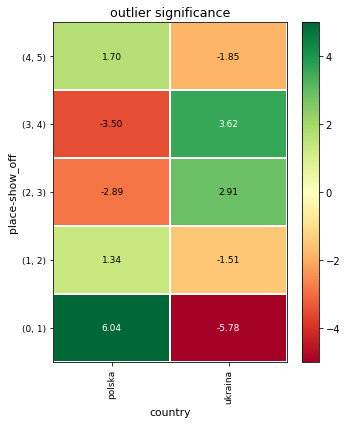

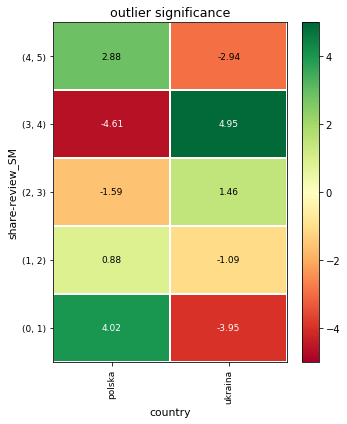

In [15]:
pairs=[["place-show_off","country"],
      ["share-review_SM","country"]
      ]

for pair in pairs:
    plot_outlier_sig(df,pair)

<a id='log_reg_cv'></a>
<a href='#0'>back</a><br>
## Logistic Regression: country
Ok, let's try to build a regression model and see if it performs.
See which features are relevant by applying either l1 regularisation or feature selection

In [4]:
# 1. Treat ordinal (likert-scale) variables as continuous (interval)
# 2. fill NaNs with middle value (=3)

df_log = df.fillna(value = 3)

X = df_log.iloc[:, 0:78]
y = df_log.country

df_log.head()

,prefs-nature,prefs-price,prefs-active_rest,prefs-mates,prefs-comfort,prefs-theme_parks,prefs-quiet,prefs-new_cultures,prefs-history,prefs-accommodation,prefs-active_time,prefs-beach,prefs-easy_access,prefs-security,prefs-weather,prefs-entertainment,prefs-meet,info-agency,info-hotel_site,info-friends,info-region_site,info-own,info-none,info-forums,info-guides,info-TripAdvisor,place-location,place-ratings,place-nature,place-show_off,place-ease,place-price,place-popularity,place-climate,place-variety,place-history,place-new,place-security,hotel-owner,hotel-reaching,hotel-recommend,hotel-price,hotel-security,hotel-cleanliness,hotel-service,hotel-location,hotel-facility,hotel-opinions,hotel-comfort,activity-sightseeing,activity-culture,activity-cuisine,activity-friends,activity-sunbathing,activity-family,activity-knowledge,activity-shopping,activity-fun,activity-sport,sat-weather,sat-nature,sat-assessment,sat-hotel,sat-friends,sat-atmosphere,sat-price,sat-expectations,sat-service,sat-cleanliness,sat-history,share-talk,share-photos_SM,share-review_SM,share-recommend_agency,share-review_hotel_int,share-review_region_int,share-recommend_hotel,share-recommend_region,age,country
138,4.0,5.0,5,5,4.0,3.0,2.0,2,4,5.0,5.0,2,5,1.0,5,5.0,5.0,2,5.0,5,3.0,5,1.0,4.0,1.0,5.0,5,5,3.0,3,5,5,5,5,5.0,3,5,2,3,5,5,5.0,3,5,5.0,5.0,3.0,4.0,5.0,3.0,2,4,5.0,3,5,3.0,5.0,5.0,5.0,5,5.0,5,5,5,5.0,5,3.0,5,5,2,5.0,5.0,5.0,2.0,1.0,1.0,2.0,3.0,18,ukraina
139,2.0,4.0,3,5,5.0,5.0,1.0,4,3,3.0,4.0,2,3,4.0,2,5.0,4.0,1,5.0,3,4.0,4,2.0,4.0,2.0,5.0,4,3,2.0,4,4,5,4,2,4.0,5,5,4,5,4,3,3.0,4,3,5.0,4.0,3.0,3.0,5.0,4.0,5,4,5.0,2,4,5.0,3.0,5.0,3.0,3,4.0,4,4,5,5.0,5,5.0,4,3,5,5.0,5.0,4.0,1.0,4.0,3.0,5.0,5.0,18,ukraina
140,1.0,4.0,5,2,3.0,3.0,4.0,2,1,3.0,2.0,1,3,1.0,3,4.0,3.0,3,4.0,1,5.0,4,2.0,5.0,3.0,3.0,5,2,3.0,2,2,4,1,3,2.0,5,3,4,2,3,5,4.0,5,1,3.0,4.0,2.0,4.0,3.0,3.0,2,5,4.0,1,3,4.0,1.0,5.0,4.0,1,3.0,1,3,4,5.0,2,1.0,3,2,5,1.0,3.0,5.0,4.0,2.0,5.0,3.0,3.0,18,ukraina
141,4.0,3.0,3,5,3.0,2.0,2.0,1,1,3.0,1.0,1,2,3.0,2,2.0,3.0,1,4.0,2,1.0,4,2.0,4.0,5.0,2.0,4,2,3.0,2,2,5,1,4,4.0,2,3,1,3,3,4,2.0,5,2,3.0,2.0,5.0,3.0,3.0,2.0,4,5,2.0,3,2,4.0,3.0,4.0,1.0,5,5.0,2,4,2,3.0,2,3.0,4,4,3,2.0,3.0,3.0,2.0,4.0,3.0,5.0,2.0,18,polska
142,5.0,5.0,5,5,5.0,5.0,5.0,5,5,5.0,5.0,5,5,5.0,5,5.0,5.0,5,4.0,5,4.0,5,1.0,4.0,4.0,2.0,5,5,5.0,4,5,5,5,5,5.0,5,5,5,3,4,4,5.0,5,5,5.0,5.0,5.0,5.0,5.0,5.0,5,5,5.0,5,5,5.0,5.0,5.0,5.0,5,5.0,5,5,5,5.0,5,5.0,5,5,5,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,18,polska


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

from sklearn.linear_model import LogisticRegressionCV
#clf = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear', n_jobs=-1)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='liblinear', n_jobs=-1, C=10)

from sklearn.feature_selection import RFECV
selector = RFECV(clf, step=1, cv=10, n_jobs=-1)

In [6]:
#build the linear model + base line (random from uniform distr)

def get_split():

    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

    # Fix the distributions - apply power transformer

    pt_fit = pt.fit(X_train[cols])
    X_train[cols] = pt_fit.transform(X_train[cols])
    X_test[cols] = pt_fit.transform(X_test[cols])
    
    return X_train, X_test, y_train, y_test


#fit the model

def get_estimate():
    
    X_train, X_test, y_train, y_test = get_split()
    
    clf.fit(X_train,y_train)
    model_score=clf.score(X_test, y_test)
    
    #base line
    
    x=np.random.uniform(low=0.0, high=1.0, size=len(y_test))
    pred=[]
    for i in x:
        if i<0.5:
            pred=pred+['ukraina']
        else:
            pred=pred+['polska']

    i=0
    for p, t in zip(pred, y_test):
        i=i+(p==t)
    base_score= i/len(y_test)
    
    #coefficients
    coef_dict = dict(zip(cols, clf.coef_[0,:]))
    coef_dict_srt = sorted(coef_dict.items(), key=lambda k: abs(k[1]), reverse=True)
    
    return model_score, base_score, coef_dict_srt


#select features

def get_select():
    
    #X_train, X_test, y_train, y_test = get_split()
    
    sel = selector.fit(X,y)
    
    var_rank = dict(zip(cols+['age'], sel.support_))   
    #var_rank_srt = sorted(var_rank.items(), key=lambda k: k[1])
    
    return var_rank

b_score:  0.5666666666666667  m_score:  0.6666666666666666
b_score:  0.36666666666666664  m_score:  0.7
b_score:  0.4666666666666667  m_score:  0.5
b_score:  0.5666666666666667  m_score:  0.6333333333333333
b_score:  0.43333333333333335  m_score:  0.5
b_score:  0.5666666666666667  m_score:  0.6
b_score:  0.36666666666666664  m_score:  0.6
b_score:  0.5  m_score:  0.5
b_score:  0.5666666666666667  m_score:  0.6
b_score:  0.4  m_score:  0.5666666666666667
b_score:  0.5333333333333333  m_score:  0.5666666666666667
b_score:  0.5  m_score:  0.7
b_score:  0.36666666666666664  m_score:  0.5666666666666667
b_score:  0.4666666666666667  m_score:  0.5
b_score:  0.43333333333333335  m_score:  0.6333333333333333
b_score:  0.5333333333333333  m_score:  0.5666666666666667
b_score:  0.6  m_score:  0.5
b_score:  0.5  m_score:  0.6
b_score:  0.5  m_score:  0.5333333333333333
b_score:  0.4666666666666667  m_score:  0.6666666666666666


[('hotel-facility', -5.658400656474811),
 ('sat-friends', -4.590663680371348),
 ('place-ease', 4.439767033199757),
 ('info-none', 4.231677293221883),
 ('prefs-quiet', -4.215377886821345),
 ('hotel-location', 4.214824075321474),
 ('share-review_region_int', 4.016126184270525),
 ('share-review_hotel_int', -4.0103541106376),
 ('place-location', -3.913653153074001),
 ('sat-cleanliness', 3.5935037017289067),
 ('activity-culture', -3.154698356163162),
 ('activity-shopping', 3.1055229568687626),
 ('share-recommend_agency', -3.091970049305241),
 ('place-price', -3.0713659576436196),
 ('place-new', 2.9391034829109244),
 ('activity-fun', -2.900056130893825),
 ('share-review_SM', 2.7766220956345737),
 ('activity-knowledge', 2.7478167043070973),
 ('prefs-weather', 2.7436155984558495),
 ('prefs-security', -2.6994891172561837),
 ('share-photos_SM', -2.6428296225132026),
 ('sat-atmosphere', 2.639674166172326),
 ('info-region_site', 2.625680606304042),
 ('prefs-accommodation', -2.424209574958429),
 ('

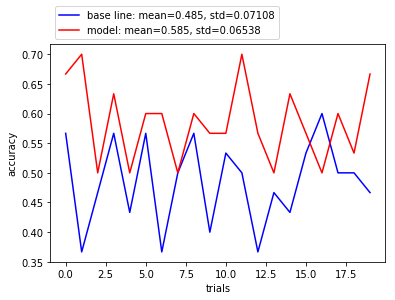

In [8]:
#Get average improvement vs base line:

from statistics import mean

import warnings
warnings.filterwarnings('ignore')

bl_score=[]
md_score=[]

for i in range(20):
    m,b,coefs = get_estimate()
    bl_score.append(b)
    md_score.append(m)
    print('b_score: ',b,' m_score: ',m)

fig, ax = plt.subplots()
plt.plot(bl_score, 
         label='base line: mean={:1.4}, std={:1.4}'.format(mean(bl_score),np.std(bl_score)), 
         color='b'
        )
plt.plot(md_score, 
         label='model: mean={:1.4}, std={:1.4}'.format(mean(md_score),np.std(md_score)), 
         color='r'
        )
ax.legend(bbox_to_anchor=(0,1), loc='lower left')
#ax.set_title('logistic regression performance')
ax.set_xlabel('trials')
ax.set_ylabel('accuracy')    

coefs

In [32]:
clf.get_params(deep=True)

{'Cs': 10,
 'class_weight': None,
 'cv': 10,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': -1,
 'penalty': 'l1',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0}

In [13]:
#Selecting features

exclusions=set()
exl = set()

for i in range(10):
    rnk = get_select()    
    [exclusions.add(k) for k,v in rnk.items() if not v]
    diff = exclusions ^ exl
    exl=exclusions
    exclusions.clear()
    print(diff)
    


{'info-forums', 'info-hotel_site', 'sat-assessment', 'activity-cuisine', 'prefs-security', 'hotel-reaching', 'activity-knowledge', 'sat-hotel', 'prefs-meet', 'prefs-price', 'share-review_SM', 'info-agency', 'hotel-service', 'place-climate'}
set()
set()
set()
set()
set()
set()
set()
set()
set()


<a id='fac_an'></a>
<a href='#0'>back</a><br>

## Factor Analysis

In [9]:
#do the transformations for the new df

df_fac = df.fillna(value = 3)
X = df_fac.iloc[:, 0:78]
y = df_fac.country

pt_fit = pt.fit(X[cols])
X[cols] = pt_fit.transform(X[cols])

In [10]:
#Find MLE complonents (PCA)

from sklearn.decomposition import PCA, FactorAnalysis

pca = PCA(svd_solver='full', n_components='mle')
pca.fit(X)
n_components_pca_mle = pca.n_components_
n_components_pca_mle

10

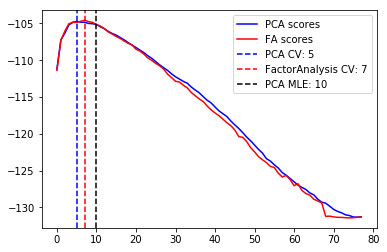

In [11]:
from sklearn.model_selection import cross_val_score

n_components = np.arange(0, X.shape[1], 1)

def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X, cv=5)))
        fa_scores.append(np.mean(cross_val_score(fa, X, cv=5)))

    return pca_scores, fa_scores

pca = PCA(svd_solver='full', n_components='mle')
pca.fit(X)
n_components_pca_mle = pca.n_components_

pca_scores, fa_scores = compute_scores(X)
n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]

#plot figure
plt.figure()
plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.axvline(n_components_pca, color='b',
                label=f'PCA CV: {n_components_pca}', linestyle='--')
plt.axvline(n_components_fa, color='r',
                label=f'FactorAnalysis CV: {n_components_fa}',
                linestyle='--')
plt.axvline(n_components_pca_mle, color='k',
                label=f'PCA MLE: {n_components_pca_mle}', linestyle='--')
plt.legend()
plt.show()

In [19]:
pd.DataFrame(pca.components_,columns=X.columns)
#pca.explained_variance_ratio_

,prefs-nature,prefs-price,prefs-active_rest,prefs-mates,prefs-comfort,prefs-theme_parks,prefs-quiet,prefs-new_cultures,prefs-history,prefs-accommodation,prefs-active_time,prefs-beach,prefs-easy_access,prefs-security,prefs-weather,prefs-entertainment,prefs-meet,info-agency,info-hotel_site,info-friends,info-region_site,info-own,info-none,info-forums,info-guides,info-TripAdvisor,place-location,place-ratings,place-nature,place-show_off,place-ease,place-price,place-popularity,place-climate,place-variety,place-history,place-new,place-security,hotel-owner,hotel-reaching,hotel-recommend,hotel-price,hotel-security,hotel-cleanliness,hotel-service,hotel-location,hotel-facility,hotel-opinions,hotel-comfort,activity-sightseeing,activity-culture,activity-cuisine,activity-friends,activity-sunbathing,activity-family,activity-knowledge,activity-shopping,activity-fun,activity-sport,sat-weather,sat-nature,sat-assessment,sat-hotel,sat-friends,sat-atmosphere,sat-price,sat-expectations,sat-service,sat-cleanliness,sat-history,share-talk,share-photos_SM,share-review_SM,share-recommend_agency,share-review_hotel_int,share-review_region_int,share-recommend_hotel,share-recommend_region,age
0,-0.055394,-0.051604,-0.081542,-0.075658,-0.094985,-0.150409,-0.087882,-0.093636,-0.071934,-0.120003,-0.091130,-0.101765,-0.131035,-0.131193,-0.085888,-0.113111,-0.119834,-0.151954,-0.021188,-0.095291,-0.124865,-0.053229,-0.045020,-0.063353,-0.128142,-0.039467,-0.088991,-0.129824,-0.103801,-0.145521,-0.171179,-0.083908,-0.167970,-0.095211,-0.081006,-0.128359,-0.101461,-0.134130,-0.150668,-0.123614,-0.116345,-0.056370,-0.117063,-0.102852,-0.163453,-0.104624,-0.134359,-0.099340,-0.116499,-0.100080,-0.109390,-0.077600,-0.069276,-0.111693,-0.121681,-0.102778,-0.132744,-0.065188,-0.094310,-0.097872,-0.091760,-0.127422,-0.123740,-0.073007,-0.061824,-0.093277,-0.089832,-0.123087,-0.099873,-0.095082,-0.103524,-0.148913,-0.150278,-0.197477,-0.178282,-0.178344,-0.168947,-0.117840,0.014312
1,0.019152,-0.098176,0.004991,-0.123935,-0.071883,0.013657,0.012971,0.060680,0.086009,-0.122762,-0.023068,-0.063636,-0.048765,-0.067920,-0.133619,-0.056400,0.020266,0.186569,-0.077978,-0.055693,0.035255,0.011125,0.186896,-0.064501,0.113788,-0.088954,-0.107404,-0.074884,-0.029399,0.103679,-0.058577,-0.135042,-0.016647,-0.116159,-0.100238,0.106681,-0.023143,-0.130116,0.024551,-0.086687,-0.040212,-0.154447,-0.103866,-0.142460,-0.106299,-0.101093,-0.026600,-0.092984,-0.099097,0.049994,0.082366,-0.022474,-0.128556,0.043785,-0.036643,0.081949,0.010390,-0.081541,-0.032665,-0.098645,-0.041958,-0.059703,-0.102365,-0.134978,-0.094452,-0.096627,-0.110056,-0.076854,-0.127709,0.112439,-0.113406,0.005913,0.207817,0.239767,0.348433,0.365321,0.201192,0.146867,-0.112138
2,0.119111,0.049572,-0.022335,0.045483,-0.045199,-0.179942,-0.056818,0.263988,0.320160,-0.053266,0.004416,-0.137780,-0.045769,0.061567,-0.079722,-0.156621,-0.001705,-0.100700,0.014166,0.020089,-0.072996,0.046972,-0.100638,0.010460,-0.021569,0.054028,0.043432,-0.012591,0.144824,-0.120794,-0.064006,0.031488,-0.024253,-0.051113,0.037641,0.260044,0.182443,0.068806,-0.021570,0.023808,-0.067155,0.051934,0.060104,0.016784,-0.018071,0.026953,-0.183113,-0.024976,-0.052313,0.243643,0.305570,0.100623,-0.028323,-0.112417,-0.066666,0.195252,-0.161455,-0.158130,0.036635,-0.080323,0.113787,0.082074,-0.062573,0.036747,0.037619,0.027806,0.016835,-0.057366,-0.026527,0.252095,0.085460,-0.018644,-0.109243,-0.069946,-0.053328,-0.053378,-0.033836,0.141223,0.231156
3,0.106272,0.006542,-0.058845,-0.045860,0.042389,-0.025231,0.273140,-0.102696,-0.115918,0.086427,-0.075505,0.136147,0.054649,0.075083,0.070984,-0.087886,-0.147477,0.114664,-0.138722,0.032304,-0.071242,0.067498,0.000593,-0.039983,0.027485,-0.029967,-0.010258,0.021285,0.098187,-0.138279,0.000332,-0.008336,-0.178851,0.051165,-0.088589,-0.029807,-0.126148,0.034633,0.046601,-0.026312,0.033788,-0.040812,0.024025,0.043201,0.049272,-0.020601,0.086918,0.101876,0.023674,-0.022304,-0.077074,-0.012787,-0.117984,0.1662

In [12]:
#Try to build regression on this
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='saga', n_jobs=-1, C=10)

pca = PCA(svd_solver='full', n_components=n_components_pca)
pca.fit(X)
fac = FactorAnalysis(n_components=n_components_fa)
fac.fit(X)
pca_mle = PCA(svd_solver='full',n_components='mle')
pca_mle.fit(X)

def get_estimate_fac():
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    
    lst_train = [pca.transform(X_train),fac.transform(X_train),pca_mle.transform(X_train)]
    lst_test = [pca.transform(X_test),fac.transform(X_test),pca_mle.transform(X_test)]
    model = ['PCA', 'Factor', 'PCA MLE']
    model_score = []
    
    for train, test in zip(lst_train, lst_test):
        clf.fit(train,y_train)
        model_score.append(clf.score(test, y_test))
    
    #base line
    
    x=np.random.uniform(low=0.0, high=1.0, size=len(y_test))
    pred=[]
    for i in x:
        if i<0.5:
            pred=pred+['ukraina']
        else:
            pred=pred+['polska']

    i=0
    for p, t in zip(pred, y_test):
        i=i+(p==t)
    base_score= i/len(y_test)
   
    return model_score, base_score

b_score:  0.43333333333333335  pca:  0.6333333333333333  fac:  0.6  mle:  0.7
b_score:  0.6  pca:  0.5666666666666667  fac:  0.6  mle:  0.5333333333333333
b_score:  0.43333333333333335  pca:  0.6666666666666666  fac:  0.7  mle:  0.6
b_score:  0.5333333333333333  pca:  0.8666666666666667  fac:  0.8666666666666667  mle:  0.8
b_score:  0.5666666666666667  pca:  0.6333333333333333  fac:  0.5666666666666667  mle:  0.5
b_score:  0.5666666666666667  pca:  0.7333333333333333  fac:  0.7  mle:  0.7666666666666667
b_score:  0.5333333333333333  pca:  0.8  fac:  0.8  mle:  0.7666666666666667
b_score:  0.6  pca:  0.7  fac:  0.6666666666666666  mle:  0.6666666666666666
b_score:  0.6666666666666666  pca:  0.6333333333333333  fac:  0.7  mle:  0.5333333333333333
b_score:  0.43333333333333335  pca:  0.5  fac:  0.5666666666666667  mle:  0.5333333333333333
b_score:  0.4666666666666667  pca:  0.6333333333333333  fac:  0.6  mle:  0.6333333333333333
b_score:  0.5  pca:  0.8  fac:  0.7  mle:  0.766666666666666

Text(0, 0.5, 'accuracy')

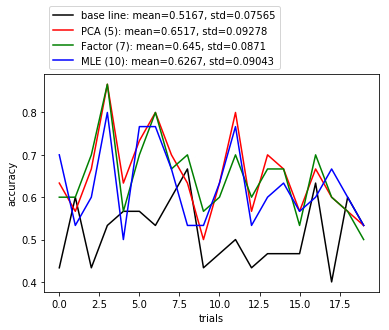

In [13]:
#Get 3 re-smapling plots vs base line:

from statistics import mean

import warnings
warnings.filterwarnings('ignore')

bl_score, pca_score, fac_score, mle_score =[],[],[],[]

for i in range(20):
    m,b = get_estimate_fac()
    bl_score.append(b)
    pca_score.append(m[0])
    fac_score.append(m[1])
    mle_score.append(m[2])
    print('b_score: ',b,
          ' pca: ',m[0],
          ' fac: ',m[1],
          ' mle: ',m[2]
         )

fig, ax = plt.subplots()
plt.plot(bl_score, 
         label='base line: mean={:1.4}, std={:1.4}'.format(mean(bl_score),np.std(bl_score)),
         color='k'
        )
plt.plot(pca_score, 
         label='PCA ({:}): mean={:1.4}, std={:1.4}'.format(n_components_pca,mean(pca_score),np.std(pca_score)), 
         color='r'
        )
plt.plot(fac_score, 
         label='Factor ({:}): mean={:1.4}, std={:1.4}'.format(n_components_fa,mean(fac_score),np.std(fac_score)), 
         color='g'
        )
plt.plot(mle_score, 
         label='MLE ({:}): mean={:1.4}, std={:1.4}'.format(n_components_pca_mle,mean(mle_score),np.std(mle_score)), 
         color='b'
        )
ax.legend(bbox_to_anchor=(0,1), loc="lower left")
ax.set_xlabel('trials')
ax.set_ylabel('accuracy')